In [ ]:
import csv
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import torch
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# 就職可否予測AI
## 使用データセット：College Student Placement Factors Dataset

https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset

IQ; 知能指数

Prev_Sem_Result; 前学期の成績

CGPA; 累積GPA

Academic_Performance; 学業成績評価

Internship_Experience; インターン経験

Extra_Curricular_Score; 課外活動スコア

Communication_Skills; コミュニケーションスキル

Projects_Completed; 完了したプロジェクト数

Placement; "No":就職が決定しなかった，"Yes":就職が決定した

In [ ]:
path = kagglehub.dataset_download("sahilislam007/college-student-placement-factors-dataset")

x = list()
t = list()
with open(f"{path}/college_student_placement_dataset.csv", "r") as f:
    reader = csv.reader(f)

    for i, L in enumerate(reader):
        if i == 0:
            print(L)
            continue

        # College_IDを除き、Placementも除いた特徴量データ
        input_raw = L[1:-1]

        # 文字列の"Yes"/"No"を数値の1.0/0.0に変換
        input_raw[4] = 1.0 if input_raw[4].strip().lower() == 'yes' else 0.0

        # 残りの値をfloat型に変換
        input = list(map(float, input_raw))

        # 就職した場合("Yes")は1.0、そうでない場合("No")は0.0 として変換する
        teacher_signal = [1.0 if L[9].strip().lower() == 'yes' else 0.0]

        x.append(input)
        t.append(teacher_signal)

# データを学習用と検証用に分割する
tmp = list(zip(x, t))
train_tmp, test_tmp = train_test_split(tmp, test_size = 0.1)
train_x, train_t = zip(*train_tmp)
test_x, test_t = zip(*test_tmp)

train_x = torch.tensor(train_x, dtype=torch.float32)
train_t = torch.tensor(train_t, dtype=torch.float32)

# 平均と標準偏差を計算
mean_x = train_x.mean(dim=0, keepdim=True)
sd_x = (train_x - mean_x).pow(2).mean(dim=0, keepdim=True).pow(0.5)

# 標準化
train_x = (train_x - mean_x) / (sd_x + 1e-6)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_t = torch.tensor(test_t, dtype=torch.float32)

test_x = (test_x - mean_x) / (sd_x + 1e-6)

#
train_x.shape, train_t.shape, test_x.shape, test_t.shape

['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Internship_Experience', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'Placement']


(torch.Size([9000, 8]),
 torch.Size([9000, 1]),
 torch.Size([1000, 8]),
 torch.Size([1000, 1]))

In [ ]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = torch.nn.Linear(8, 128)
        self.sigmoid1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(128, 1)
        self.sigmoid2 = torch.nn.Sigmoid()

    def __call__(self, input:torch.tensor):
        """
            input(batch_size, 8)
        """
        Y = self.fc1(input)
        Y = self.sigmoid1(Y)
        Y = self.fc2(Y)
        Y = self.sigmoid2(Y)

        return Y

model = MyModel()
model(train_x[:1])

tensor([[0.5019]], grad_fn=<SigmoidBackward0>)

100%|██████████| 14/14 [00:00<00:00, 408.30it/s, loss=0.711, accuracy=0.363]


epoch; 1


100%|██████████| 14/14 [00:00<00:00, 261.55it/s, loss=0.454, accuracy=0.8]


epoch; 2


100%|██████████| 14/14 [00:00<00:00, 288.19it/s, loss=0.41, accuracy=0.835]


epoch; 3


100%|██████████| 14/14 [00:00<00:00, 271.31it/s, loss=0.393, accuracy=0.835]


epoch; 4


100%|██████████| 14/14 [00:00<00:00, 292.02it/s, loss=0.376, accuracy=0.835]


epoch; 5


100%|██████████| 14/14 [00:00<00:00, 289.81it/s, loss=0.361, accuracy=0.835]


epoch; 6


100%|██████████| 14/14 [00:00<00:00, 308.68it/s, loss=0.35, accuracy=0.836]


epoch; 7


100%|██████████| 14/14 [00:00<00:00, 300.95it/s, loss=0.337, accuracy=0.837]


epoch; 8


100%|██████████| 14/14 [00:00<00:00, 265.82it/s, loss=0.325, accuracy=0.84]


epoch; 9


100%|██████████| 14/14 [00:00<00:00, 304.14it/s, loss=0.316, accuracy=0.845]


epoch; 10


100%|██████████| 14/14 [00:00<00:00, 256.60it/s, loss=0.307, accuracy=0.851]


epoch; 11


100%|██████████| 14/14 [00:00<00:00, 283.89it/s, loss=0.301, accuracy=0.854]


epoch; 12


100%|██████████| 14/14 [00:00<00:00, 278.68it/s, loss=0.293, accuracy=0.863]


epoch; 13


100%|██████████| 14/14 [00:00<00:00, 299.45it/s, loss=0.287, accuracy=0.866]


epoch; 14


100%|██████████| 14/14 [00:00<00:00, 307.98it/s, loss=0.28, accuracy=0.877]


epoch; 15


100%|██████████| 14/14 [00:00<00:00, 254.98it/s, loss=0.274, accuracy=0.881]


epoch; 16


100%|██████████| 14/14 [00:00<00:00, 261.14it/s, loss=0.27, accuracy=0.883]


epoch; 17


100%|██████████| 14/14 [00:00<00:00, 276.91it/s, loss=0.265, accuracy=0.885]


epoch; 18


100%|██████████| 14/14 [00:00<00:00, 235.63it/s, loss=0.262, accuracy=0.89]


epoch; 19


100%|██████████| 14/14 [00:00<00:00, 252.60it/s, loss=0.258, accuracy=0.891]


epoch; 20


100%|██████████| 14/14 [00:00<00:00, 281.43it/s, loss=0.254, accuracy=0.891]


epoch; 21


100%|██████████| 14/14 [00:00<00:00, 240.79it/s, loss=0.251, accuracy=0.893]


epoch; 22


100%|██████████| 14/14 [00:00<00:00, 242.18it/s, loss=0.249, accuracy=0.896]


epoch; 23


100%|██████████| 14/14 [00:00<00:00, 243.54it/s, loss=0.246, accuracy=0.896]


epoch; 24


100%|██████████| 14/14 [00:00<00:00, 265.42it/s, loss=0.245, accuracy=0.895]


epoch; 25


100%|██████████| 14/14 [00:00<00:00, 242.25it/s, loss=0.242, accuracy=0.897]


epoch; 26


100%|██████████| 14/14 [00:00<00:00, 240.62it/s, loss=0.241, accuracy=0.899]


epoch; 27


100%|██████████| 14/14 [00:00<00:00, 304.83it/s, loss=0.239, accuracy=0.9]


epoch; 28


100%|██████████| 14/14 [00:00<00:00, 211.74it/s, loss=0.236, accuracy=0.899]


epoch; 29


100%|██████████| 14/14 [00:00<00:00, 217.47it/s, loss=0.235, accuracy=0.899]


epoch; 30


100%|██████████| 14/14 [00:00<00:00, 310.36it/s, loss=0.233, accuracy=0.9]


epoch; 31


100%|██████████| 14/14 [00:00<00:00, 307.71it/s, loss=0.233, accuracy=0.901]


epoch; 32


100%|██████████| 14/14 [00:00<00:00, 320.97it/s, loss=0.231, accuracy=0.902]


epoch; 33


100%|██████████| 14/14 [00:00<00:00, 294.29it/s, loss=0.231, accuracy=0.9]


epoch; 34


100%|██████████| 14/14 [00:00<00:00, 248.66it/s, loss=0.229, accuracy=0.901]


epoch; 35


100%|██████████| 14/14 [00:00<00:00, 201.19it/s, loss=0.228, accuracy=0.902]


epoch; 36


100%|██████████| 14/14 [00:00<00:00, 231.99it/s, loss=0.227, accuracy=0.902]


epoch; 37


100%|██████████| 14/14 [00:00<00:00, 212.19it/s, loss=0.226, accuracy=0.903]


epoch; 38


100%|██████████| 14/14 [00:00<00:00, 214.42it/s, loss=0.226, accuracy=0.902]


epoch; 39


100%|██████████| 14/14 [00:00<00:00, 230.11it/s, loss=0.226, accuracy=0.902]


epoch; 40


100%|██████████| 14/14 [00:00<00:00, 220.02it/s, loss=0.224, accuracy=0.903]


epoch; 41


100%|██████████| 14/14 [00:00<00:00, 261.70it/s, loss=0.224, accuracy=0.903]


epoch; 42


100%|██████████| 14/14 [00:00<00:00, 278.04it/s, loss=0.223, accuracy=0.903]


epoch; 43


100%|██████████| 14/14 [00:00<00:00, 260.86it/s, loss=0.223, accuracy=0.903]


epoch; 44


100%|██████████| 14/14 [00:00<00:00, 196.45it/s, loss=0.222, accuracy=0.903]


epoch; 45


100%|██████████| 14/14 [00:00<00:00, 274.39it/s, loss=0.222, accuracy=0.903]


epoch; 46


100%|██████████| 14/14 [00:00<00:00, 218.95it/s, loss=0.222, accuracy=0.902]


epoch; 47


100%|██████████| 14/14 [00:00<00:00, 268.47it/s, loss=0.222, accuracy=0.902]


epoch; 48


100%|██████████| 14/14 [00:00<00:00, 296.69it/s, loss=0.221, accuracy=0.903]


epoch; 49


100%|██████████| 14/14 [00:00<00:00, 303.03it/s, loss=0.22, accuracy=0.902]


epoch; 50


100%|██████████| 14/14 [00:00<00:00, 305.24it/s, loss=0.22, accuracy=0.903]


epoch; 51


100%|██████████| 14/14 [00:00<00:00, 254.71it/s, loss=0.22, accuracy=0.902]


epoch; 52


100%|██████████| 14/14 [00:00<00:00, 308.12it/s, loss=0.22, accuracy=0.902]


epoch; 53


100%|██████████| 14/14 [00:00<00:00, 281.78it/s, loss=0.219, accuracy=0.903]


epoch; 54


100%|██████████| 14/14 [00:00<00:00, 263.64it/s, loss=0.219, accuracy=0.904]


epoch; 55


100%|██████████| 14/14 [00:00<00:00, 221.26it/s, loss=0.219, accuracy=0.903]


epoch; 56


100%|██████████| 14/14 [00:00<00:00, 243.42it/s, loss=0.219, accuracy=0.903]


epoch; 57


100%|██████████| 14/14 [00:00<00:00, 270.12it/s, loss=0.22, accuracy=0.902]


epoch; 58


100%|██████████| 14/14 [00:00<00:00, 228.63it/s, loss=0.218, accuracy=0.903]


epoch; 59


100%|██████████| 14/14 [00:00<00:00, 260.80it/s, loss=0.218, accuracy=0.904]


epoch; 60


100%|██████████| 14/14 [00:00<00:00, 295.47it/s, loss=0.218, accuracy=0.903]


epoch; 61


100%|██████████| 14/14 [00:00<00:00, 271.62it/s, loss=0.218, accuracy=0.904]


epoch; 62


100%|██████████| 14/14 [00:00<00:00, 267.03it/s, loss=0.218, accuracy=0.903]


epoch; 63


100%|██████████| 14/14 [00:00<00:00, 285.48it/s, loss=0.218, accuracy=0.903]


epoch; 64


100%|██████████| 14/14 [00:00<00:00, 294.61it/s, loss=0.217, accuracy=0.903]


epoch; 65


100%|██████████| 14/14 [00:00<00:00, 271.00it/s, loss=0.217, accuracy=0.903]


epoch; 66


100%|██████████| 14/14 [00:00<00:00, 186.48it/s, loss=0.217, accuracy=0.903]


epoch; 67


100%|██████████| 14/14 [00:00<00:00, 258.86it/s, loss=0.217, accuracy=0.902]


epoch; 68


100%|██████████| 14/14 [00:00<00:00, 283.00it/s, loss=0.217, accuracy=0.903]


epoch; 69


100%|██████████| 14/14 [00:00<00:00, 231.66it/s, loss=0.217, accuracy=0.903]


epoch; 70


100%|██████████| 14/14 [00:00<00:00, 282.78it/s, loss=0.217, accuracy=0.904]


epoch; 71


100%|██████████| 14/14 [00:00<00:00, 256.84it/s, loss=0.217, accuracy=0.903]


epoch; 72


100%|██████████| 14/14 [00:00<00:00, 306.56it/s, loss=0.217, accuracy=0.903]


epoch; 73


100%|██████████| 14/14 [00:00<00:00, 219.79it/s, loss=0.218, accuracy=0.902]


epoch; 74


100%|██████████| 14/14 [00:00<00:00, 216.35it/s, loss=0.217, accuracy=0.903]


epoch; 75


100%|██████████| 14/14 [00:00<00:00, 122.43it/s, loss=0.217, accuracy=0.903]


epoch; 76


100%|██████████| 14/14 [00:00<00:00, 144.75it/s, loss=0.217, accuracy=0.903]


epoch; 77


100%|██████████| 14/14 [00:00<00:00, 172.17it/s, loss=0.217, accuracy=0.903]


epoch; 78


100%|██████████| 14/14 [00:00<00:00, 240.35it/s, loss=0.216, accuracy=0.904]


epoch; 79


100%|██████████| 14/14 [00:00<00:00, 120.45it/s, loss=0.217, accuracy=0.904]


epoch; 80


100%|██████████| 14/14 [00:00<00:00, 165.80it/s, loss=0.216, accuracy=0.903]


epoch; 81


100%|██████████| 14/14 [00:00<00:00, 194.55it/s, loss=0.217, accuracy=0.904]


epoch; 82


100%|██████████| 14/14 [00:00<00:00, 120.70it/s, loss=0.216, accuracy=0.903]


epoch; 83


100%|██████████| 14/14 [00:00<00:00, 268.49it/s, loss=0.216, accuracy=0.902]


epoch; 84


100%|██████████| 14/14 [00:00<00:00, 146.47it/s, loss=0.218, accuracy=0.903]


epoch; 85


100%|██████████| 14/14 [00:00<00:00, 265.01it/s, loss=0.216, accuracy=0.902]


epoch; 86


100%|██████████| 14/14 [00:00<00:00, 108.53it/s, loss=0.216, accuracy=0.903]


epoch; 87


100%|██████████| 14/14 [00:00<00:00, 288.49it/s, loss=0.216, accuracy=0.903]


epoch; 88


100%|██████████| 14/14 [00:00<00:00, 91.45it/s, loss=0.216, accuracy=0.903]


epoch; 89


100%|██████████| 14/14 [00:00<00:00, 278.19it/s, loss=0.216, accuracy=0.903]


epoch; 90


100%|██████████| 14/14 [00:00<00:00, 174.92it/s, loss=0.216, accuracy=0.904]


epoch; 91


100%|██████████| 14/14 [00:00<00:00, 200.66it/s, loss=0.218, accuracy=0.902]


epoch; 92


100%|██████████| 14/14 [00:00<00:00, 190.17it/s, loss=0.216, accuracy=0.904]


epoch; 93


100%|██████████| 14/14 [00:00<00:00, 169.69it/s, loss=0.216, accuracy=0.903]


epoch; 94


100%|██████████| 14/14 [00:00<00:00, 207.90it/s, loss=0.216, accuracy=0.904]


epoch; 95


100%|██████████| 14/14 [00:00<00:00, 304.17it/s, loss=0.216, accuracy=0.903]


epoch; 96


100%|██████████| 14/14 [00:00<00:00, 263.25it/s, loss=0.216, accuracy=0.904]


epoch; 97


100%|██████████| 14/14 [00:00<00:00, 199.54it/s, loss=0.216, accuracy=0.903]


epoch; 98


100%|██████████| 14/14 [00:00<00:00, 227.70it/s, loss=0.216, accuracy=0.903]


epoch; 99


100%|██████████| 14/14 [00:00<00:00, 159.31it/s, loss=0.216, accuracy=0.903]


epoch; 100


100%|██████████| 14/14 [00:00<00:00, 264.47it/s, loss=0.216, accuracy=0.904]


epoch; 101


100%|██████████| 14/14 [00:00<00:00, 149.04it/s, loss=0.216, accuracy=0.903]


epoch; 102


100%|██████████| 14/14 [00:00<00:00, 258.01it/s, loss=0.216, accuracy=0.903]


epoch; 103


100%|██████████| 14/14 [00:00<00:00, 275.14it/s, loss=0.216, accuracy=0.904]


epoch; 104


100%|██████████| 14/14 [00:00<00:00, 211.19it/s, loss=0.216, accuracy=0.903]


epoch; 105


100%|██████████| 14/14 [00:00<00:00, 173.33it/s, loss=0.216, accuracy=0.904]


epoch; 106


100%|██████████| 14/14 [00:00<00:00, 302.61it/s, loss=0.216, accuracy=0.904]


epoch; 107


100%|██████████| 14/14 [00:00<00:00, 281.12it/s, loss=0.216, accuracy=0.904]


epoch; 108


100%|██████████| 14/14 [00:00<00:00, 288.67it/s, loss=0.216, accuracy=0.903]


epoch; 109


100%|██████████| 14/14 [00:00<00:00, 210.08it/s, loss=0.216, accuracy=0.903]


epoch; 110


100%|██████████| 14/14 [00:00<00:00, 276.66it/s, loss=0.216, accuracy=0.903]


epoch; 111


100%|██████████| 14/14 [00:00<00:00, 223.25it/s, loss=0.216, accuracy=0.903]


epoch; 112


100%|██████████| 14/14 [00:00<00:00, 207.48it/s, loss=0.216, accuracy=0.904]


epoch; 113


100%|██████████| 14/14 [00:00<00:00, 251.36it/s, loss=0.216, accuracy=0.903]


epoch; 114


100%|██████████| 14/14 [00:00<00:00, 286.38it/s, loss=0.216, accuracy=0.903]


epoch; 115


100%|██████████| 14/14 [00:00<00:00, 252.71it/s, loss=0.216, accuracy=0.903]


epoch; 116


100%|██████████| 14/14 [00:00<00:00, 194.42it/s, loss=0.216, accuracy=0.904]


epoch; 117


100%|██████████| 14/14 [00:00<00:00, 269.82it/s, loss=0.217, accuracy=0.903]


epoch; 118


100%|██████████| 14/14 [00:00<00:00, 251.11it/s, loss=0.216, accuracy=0.903]


epoch; 119


100%|██████████| 14/14 [00:00<00:00, 263.84it/s, loss=0.216, accuracy=0.903]


epoch; 120


100%|██████████| 14/14 [00:00<00:00, 200.56it/s, loss=0.216, accuracy=0.903]


epoch; 121


100%|██████████| 14/14 [00:00<00:00, 277.13it/s, loss=0.216, accuracy=0.903]


epoch; 122


100%|██████████| 14/14 [00:00<00:00, 268.35it/s, loss=0.216, accuracy=0.904]


epoch; 123


100%|██████████| 14/14 [00:00<00:00, 243.61it/s, loss=0.215, accuracy=0.902]


epoch; 124


100%|██████████| 14/14 [00:00<00:00, 206.24it/s, loss=0.215, accuracy=0.904]


epoch; 125


100%|██████████| 14/14 [00:00<00:00, 170.51it/s, loss=0.216, accuracy=0.902]


epoch; 126


100%|██████████| 14/14 [00:00<00:00, 235.87it/s, loss=0.216, accuracy=0.903]


epoch; 127


100%|██████████| 14/14 [00:00<00:00, 193.15it/s, loss=0.216, accuracy=0.903]


epoch; 128


100%|██████████| 14/14 [00:00<00:00, 193.95it/s, loss=0.215, accuracy=0.903]


epoch; 129


100%|██████████| 14/14 [00:00<00:00, 241.60it/s, loss=0.217, accuracy=0.902]


epoch; 130


100%|██████████| 14/14 [00:00<00:00, 212.78it/s, loss=0.215, accuracy=0.903]


epoch; 131


100%|██████████| 14/14 [00:00<00:00, 217.45it/s, loss=0.215, accuracy=0.903]


epoch; 132


100%|██████████| 14/14 [00:00<00:00, 265.46it/s, loss=0.215, accuracy=0.903]


epoch; 133


100%|██████████| 14/14 [00:00<00:00, 197.90it/s, loss=0.215, accuracy=0.903]


epoch; 134


100%|██████████| 14/14 [00:00<00:00, 252.55it/s, loss=0.215, accuracy=0.903]


epoch; 135


100%|██████████| 14/14 [00:00<00:00, 251.14it/s, loss=0.215, accuracy=0.903]


epoch; 136


100%|██████████| 14/14 [00:00<00:00, 248.44it/s, loss=0.217, accuracy=0.904]


epoch; 137


100%|██████████| 14/14 [00:00<00:00, 222.84it/s, loss=0.216, accuracy=0.903]


epoch; 138


100%|██████████| 14/14 [00:00<00:00, 233.37it/s, loss=0.215, accuracy=0.903]


epoch; 139


100%|██████████| 14/14 [00:00<00:00, 249.83it/s, loss=0.215, accuracy=0.903]


epoch; 140


100%|██████████| 14/14 [00:00<00:00, 230.26it/s, loss=0.215, accuracy=0.903]


epoch; 141


100%|██████████| 14/14 [00:00<00:00, 210.56it/s, loss=0.215, accuracy=0.904]


epoch; 142


100%|██████████| 14/14 [00:00<00:00, 243.51it/s, loss=0.215, accuracy=0.904]


epoch; 143


100%|██████████| 14/14 [00:00<00:00, 269.92it/s, loss=0.216, accuracy=0.903]


epoch; 144


100%|██████████| 14/14 [00:00<00:00, 246.80it/s, loss=0.216, accuracy=0.903]


epoch; 145


100%|██████████| 14/14 [00:00<00:00, 254.24it/s, loss=0.215, accuracy=0.904]


epoch; 146


100%|██████████| 14/14 [00:00<00:00, 162.95it/s, loss=0.215, accuracy=0.904]


epoch; 147


100%|██████████| 14/14 [00:00<00:00, 143.89it/s, loss=0.215, accuracy=0.903]


epoch; 148


100%|██████████| 14/14 [00:00<00:00, 214.93it/s, loss=0.216, accuracy=0.904]


epoch; 149


100%|██████████| 14/14 [00:00<00:00, 201.75it/s, loss=0.215, accuracy=0.903]


epoch; 150


100%|██████████| 14/14 [00:00<00:00, 191.77it/s, loss=0.215, accuracy=0.903]


epoch; 151


100%|██████████| 14/14 [00:00<00:00, 190.29it/s, loss=0.215, accuracy=0.903]


epoch; 152


100%|██████████| 14/14 [00:00<00:00, 178.40it/s, loss=0.215, accuracy=0.904]


epoch; 153


100%|██████████| 14/14 [00:00<00:00, 179.52it/s, loss=0.215, accuracy=0.903]


epoch; 154


100%|██████████| 14/14 [00:00<00:00, 238.39it/s, loss=0.215, accuracy=0.903]


epoch; 155


100%|██████████| 14/14 [00:00<00:00, 260.93it/s, loss=0.215, accuracy=0.903]


epoch; 156


100%|██████████| 14/14 [00:00<00:00, 296.50it/s, loss=0.215, accuracy=0.903]


epoch; 157


100%|██████████| 14/14 [00:00<00:00, 179.57it/s, loss=0.215, accuracy=0.904]


epoch; 158


100%|██████████| 14/14 [00:00<00:00, 197.55it/s, loss=0.216, accuracy=0.903]


epoch; 159


100%|██████████| 14/14 [00:00<00:00, 196.22it/s, loss=0.216, accuracy=0.902]


epoch; 160


100%|██████████| 14/14 [00:00<00:00, 215.28it/s, loss=0.215, accuracy=0.903]


epoch; 161


100%|██████████| 14/14 [00:00<00:00, 212.75it/s, loss=0.215, accuracy=0.903]


epoch; 162


100%|██████████| 14/14 [00:00<00:00, 221.63it/s, loss=0.215, accuracy=0.904]


epoch; 163


100%|██████████| 14/14 [00:00<00:00, 216.47it/s, loss=0.215, accuracy=0.904]


epoch; 164


100%|██████████| 14/14 [00:00<00:00, 300.51it/s, loss=0.215, accuracy=0.903]


epoch; 165


100%|██████████| 14/14 [00:00<00:00, 284.45it/s, loss=0.215, accuracy=0.903]


epoch; 166


100%|██████████| 14/14 [00:00<00:00, 282.35it/s, loss=0.216, accuracy=0.903]


epoch; 167


100%|██████████| 14/14 [00:00<00:00, 284.44it/s, loss=0.215, accuracy=0.904]


epoch; 168


100%|██████████| 14/14 [00:00<00:00, 213.88it/s, loss=0.216, accuracy=0.903]


epoch; 169


100%|██████████| 14/14 [00:00<00:00, 189.41it/s, loss=0.215, accuracy=0.904]


epoch; 170


100%|██████████| 14/14 [00:00<00:00, 216.38it/s, loss=0.215, accuracy=0.903]


epoch; 171


100%|██████████| 14/14 [00:00<00:00, 253.34it/s, loss=0.215, accuracy=0.903]


epoch; 172


100%|██████████| 14/14 [00:00<00:00, 288.43it/s, loss=0.215, accuracy=0.904]


epoch; 173


100%|██████████| 14/14 [00:00<00:00, 325.47it/s, loss=0.215, accuracy=0.904]


epoch; 174


100%|██████████| 14/14 [00:00<00:00, 219.35it/s, loss=0.216, accuracy=0.902]


epoch; 175


100%|██████████| 14/14 [00:00<00:00, 242.46it/s, loss=0.215, accuracy=0.904]


epoch; 176


100%|██████████| 14/14 [00:00<00:00, 177.50it/s, loss=0.215, accuracy=0.904]


epoch; 177


100%|██████████| 14/14 [00:00<00:00, 191.96it/s, loss=0.215, accuracy=0.903]


epoch; 178


100%|██████████| 14/14 [00:00<00:00, 223.32it/s, loss=0.215, accuracy=0.903]


epoch; 179


100%|██████████| 14/14 [00:00<00:00, 275.04it/s, loss=0.215, accuracy=0.902]


epoch; 180


100%|██████████| 14/14 [00:00<00:00, 310.71it/s, loss=0.215, accuracy=0.904]


epoch; 181


100%|██████████| 14/14 [00:00<00:00, 203.51it/s, loss=0.215, accuracy=0.903]


epoch; 182


100%|██████████| 14/14 [00:00<00:00, 245.07it/s, loss=0.216, accuracy=0.902]


epoch; 183


100%|██████████| 14/14 [00:00<00:00, 191.84it/s, loss=0.215, accuracy=0.904]


epoch; 184


100%|██████████| 14/14 [00:00<00:00, 177.49it/s, loss=0.215, accuracy=0.904]


epoch; 185


100%|██████████| 14/14 [00:00<00:00, 181.79it/s, loss=0.215, accuracy=0.903]


epoch; 186


100%|██████████| 14/14 [00:00<00:00, 243.42it/s, loss=0.215, accuracy=0.904]


epoch; 187


100%|██████████| 14/14 [00:00<00:00, 270.05it/s, loss=0.215, accuracy=0.903]


epoch; 188


100%|██████████| 14/14 [00:00<00:00, 284.44it/s, loss=0.215, accuracy=0.903]


epoch; 189


100%|██████████| 14/14 [00:00<00:00, 164.63it/s, loss=0.215, accuracy=0.903]


epoch; 190


100%|██████████| 14/14 [00:00<00:00, 240.30it/s, loss=0.215, accuracy=0.904]


epoch; 191


100%|██████████| 14/14 [00:00<00:00, 58.87it/s, loss=0.215, accuracy=0.903]


epoch; 192


100%|██████████| 14/14 [00:00<00:00, 108.31it/s, loss=0.215, accuracy=0.903]


epoch; 193


100%|██████████| 14/14 [00:00<00:00, 164.03it/s, loss=0.216, accuracy=0.904]


epoch; 194


100%|██████████| 14/14 [00:00<00:00, 158.52it/s, loss=0.215, accuracy=0.904]


epoch; 195


100%|██████████| 14/14 [00:00<00:00, 170.69it/s, loss=0.215, accuracy=0.903]


epoch; 196


100%|██████████| 14/14 [00:00<00:00, 192.87it/s, loss=0.215, accuracy=0.904]


epoch; 197


100%|██████████| 14/14 [00:00<00:00, 141.41it/s, loss=0.215, accuracy=0.903]


epoch; 198


100%|██████████| 14/14 [00:00<00:00, 167.88it/s, loss=0.215, accuracy=0.904]


epoch; 199


100%|██████████| 14/14 [00:00<00:00, 172.65it/s, loss=0.215, accuracy=0.903]


epoch; 200


100%|██████████| 14/14 [00:00<00:00, 161.42it/s, loss=0.215, accuracy=0.903]


epoch; 201


100%|██████████| 14/14 [00:00<00:00, 202.58it/s, loss=0.215, accuracy=0.905]


epoch; 202


100%|██████████| 14/14 [00:00<00:00, 173.81it/s, loss=0.215, accuracy=0.903]


epoch; 203


100%|██████████| 14/14 [00:00<00:00, 183.26it/s, loss=0.215, accuracy=0.904]


epoch; 204


100%|██████████| 14/14 [00:00<00:00, 177.34it/s, loss=0.215, accuracy=0.905]


epoch; 205


100%|██████████| 14/14 [00:00<00:00, 181.26it/s, loss=0.215, accuracy=0.903]


epoch; 206


100%|██████████| 14/14 [00:00<00:00, 188.20it/s, loss=0.215, accuracy=0.904]


epoch; 207


100%|██████████| 14/14 [00:00<00:00, 188.33it/s, loss=0.216, accuracy=0.904]


epoch; 208


100%|██████████| 14/14 [00:00<00:00, 200.30it/s, loss=0.214, accuracy=0.903]


epoch; 209


100%|██████████| 14/14 [00:00<00:00, 165.45it/s, loss=0.216, accuracy=0.903]


epoch; 210


100%|██████████| 14/14 [00:00<00:00, 179.52it/s, loss=0.215, accuracy=0.903]


epoch; 211


100%|██████████| 14/14 [00:00<00:00, 173.77it/s, loss=0.215, accuracy=0.903]


epoch; 212


100%|██████████| 14/14 [00:00<00:00, 165.65it/s, loss=0.215, accuracy=0.903]


epoch; 213


100%|██████████| 14/14 [00:00<00:00, 188.81it/s, loss=0.215, accuracy=0.902]


epoch; 214


100%|██████████| 14/14 [00:00<00:00, 190.21it/s, loss=0.215, accuracy=0.903]


epoch; 215


100%|██████████| 14/14 [00:00<00:00, 184.45it/s, loss=0.214, accuracy=0.904]


epoch; 216


100%|██████████| 14/14 [00:00<00:00, 184.25it/s, loss=0.215, accuracy=0.904]


epoch; 217


100%|██████████| 14/14 [00:00<00:00, 173.79it/s, loss=0.215, accuracy=0.904]


epoch; 218


100%|██████████| 14/14 [00:00<00:00, 169.56it/s, loss=0.214, accuracy=0.904]


epoch; 219


100%|██████████| 14/14 [00:00<00:00, 214.78it/s, loss=0.215, accuracy=0.901]


epoch; 220


100%|██████████| 14/14 [00:00<00:00, 177.03it/s, loss=0.215, accuracy=0.903]


epoch; 221


100%|██████████| 14/14 [00:00<00:00, 158.04it/s, loss=0.215, accuracy=0.904]


epoch; 222


100%|██████████| 14/14 [00:00<00:00, 168.79it/s, loss=0.214, accuracy=0.904]


epoch; 223


100%|██████████| 14/14 [00:00<00:00, 168.42it/s, loss=0.215, accuracy=0.904]


epoch; 224


100%|██████████| 14/14 [00:00<00:00, 167.35it/s, loss=0.214, accuracy=0.904]


epoch; 225


100%|██████████| 14/14 [00:00<00:00, 161.73it/s, loss=0.215, accuracy=0.903]


epoch; 226


100%|██████████| 14/14 [00:00<00:00, 145.69it/s, loss=0.214, accuracy=0.903]


epoch; 227


100%|██████████| 14/14 [00:00<00:00, 172.35it/s, loss=0.215, accuracy=0.904]


epoch; 228


100%|██████████| 14/14 [00:00<00:00, 169.64it/s, loss=0.214, accuracy=0.904]


epoch; 229


100%|██████████| 14/14 [00:00<00:00, 165.95it/s, loss=0.214, accuracy=0.903]


epoch; 230


100%|██████████| 14/14 [00:00<00:00, 217.92it/s, loss=0.214, accuracy=0.903]


epoch; 231


100%|██████████| 14/14 [00:00<00:00, 249.45it/s, loss=0.214, accuracy=0.903]


epoch; 232


100%|██████████| 14/14 [00:00<00:00, 250.07it/s, loss=0.214, accuracy=0.903]


epoch; 233


100%|██████████| 14/14 [00:00<00:00, 214.80it/s, loss=0.214, accuracy=0.903]


epoch; 234


100%|██████████| 14/14 [00:00<00:00, 326.81it/s, loss=0.215, accuracy=0.904]


epoch; 235


100%|██████████| 14/14 [00:00<00:00, 256.05it/s, loss=0.216, accuracy=0.904]


epoch; 236


100%|██████████| 14/14 [00:00<00:00, 260.82it/s, loss=0.214, accuracy=0.903]


epoch; 237


100%|██████████| 14/14 [00:00<00:00, 231.74it/s, loss=0.214, accuracy=0.904]


epoch; 238


100%|██████████| 14/14 [00:00<00:00, 232.22it/s, loss=0.214, accuracy=0.904]


epoch; 239


100%|██████████| 14/14 [00:00<00:00, 236.77it/s, loss=0.214, accuracy=0.903]


epoch; 240


100%|██████████| 14/14 [00:00<00:00, 317.10it/s, loss=0.214, accuracy=0.903]


epoch; 241


100%|██████████| 14/14 [00:00<00:00, 340.94it/s, loss=0.215, accuracy=0.905]


epoch; 242


100%|██████████| 14/14 [00:00<00:00, 335.21it/s, loss=0.215, accuracy=0.904]


epoch; 243


100%|██████████| 14/14 [00:00<00:00, 324.90it/s, loss=0.214, accuracy=0.904]


epoch; 244


100%|██████████| 14/14 [00:00<00:00, 321.18it/s, loss=0.214, accuracy=0.902]


epoch; 245


100%|██████████| 14/14 [00:00<00:00, 338.71it/s, loss=0.214, accuracy=0.904]


epoch; 246


100%|██████████| 14/14 [00:00<00:00, 251.65it/s, loss=0.214, accuracy=0.903]


epoch; 247


100%|██████████| 14/14 [00:00<00:00, 249.32it/s, loss=0.214, accuracy=0.903]


epoch; 248


100%|██████████| 14/14 [00:00<00:00, 283.79it/s, loss=0.215, accuracy=0.904]


epoch; 249


100%|██████████| 14/14 [00:00<00:00, 293.05it/s, loss=0.214, accuracy=0.903]


epoch; 250


100%|██████████| 14/14 [00:00<00:00, 217.23it/s, loss=0.214, accuracy=0.903]


epoch; 251


100%|██████████| 14/14 [00:00<00:00, 202.60it/s, loss=0.215, accuracy=0.904]


epoch; 252


100%|██████████| 14/14 [00:00<00:00, 275.33it/s, loss=0.214, accuracy=0.904]


epoch; 253


100%|██████████| 14/14 [00:00<00:00, 236.99it/s, loss=0.214, accuracy=0.904]


epoch; 254


100%|██████████| 14/14 [00:00<00:00, 274.83it/s, loss=0.214, accuracy=0.903]


epoch; 255


100%|██████████| 14/14 [00:00<00:00, 271.40it/s, loss=0.214, accuracy=0.903]


epoch; 256


100%|██████████| 14/14 [00:00<00:00, 279.14it/s, loss=0.214, accuracy=0.903]


epoch; 257


100%|██████████| 14/14 [00:00<00:00, 335.21it/s, loss=0.215, accuracy=0.904]


epoch; 258


100%|██████████| 14/14 [00:00<00:00, 248.72it/s, loss=0.214, accuracy=0.903]


epoch; 259


100%|██████████| 14/14 [00:00<00:00, 327.13it/s, loss=0.214, accuracy=0.903]


epoch; 260


100%|██████████| 14/14 [00:00<00:00, 292.07it/s, loss=0.214, accuracy=0.904]


epoch; 261


100%|██████████| 14/14 [00:00<00:00, 265.91it/s, loss=0.214, accuracy=0.904]


epoch; 262


100%|██████████| 14/14 [00:00<00:00, 309.51it/s, loss=0.214, accuracy=0.905]


epoch; 263


100%|██████████| 14/14 [00:00<00:00, 306.59it/s, loss=0.214, accuracy=0.903]


epoch; 264


100%|██████████| 14/14 [00:00<00:00, 329.89it/s, loss=0.214, accuracy=0.904]


epoch; 265


100%|██████████| 14/14 [00:00<00:00, 272.42it/s, loss=0.214, accuracy=0.903]


epoch; 266


100%|██████████| 14/14 [00:00<00:00, 280.70it/s, loss=0.214, accuracy=0.903]


epoch; 267


100%|██████████| 14/14 [00:00<00:00, 307.72it/s, loss=0.214, accuracy=0.904]


epoch; 268


100%|██████████| 14/14 [00:00<00:00, 328.47it/s, loss=0.214, accuracy=0.904]


epoch; 269


100%|██████████| 14/14 [00:00<00:00, 217.11it/s, loss=0.214, accuracy=0.904]


epoch; 270


100%|██████████| 14/14 [00:00<00:00, 195.96it/s, loss=0.214, accuracy=0.904]


epoch; 271


100%|██████████| 14/14 [00:00<00:00, 318.66it/s, loss=0.214, accuracy=0.905]


epoch; 272


100%|██████████| 14/14 [00:00<00:00, 237.17it/s, loss=0.214, accuracy=0.904]


epoch; 273


100%|██████████| 14/14 [00:00<00:00, 205.59it/s, loss=0.214, accuracy=0.903]


epoch; 274


100%|██████████| 14/14 [00:00<00:00, 256.95it/s, loss=0.214, accuracy=0.904]


epoch; 275


100%|██████████| 14/14 [00:00<00:00, 313.81it/s, loss=0.214, accuracy=0.904]


epoch; 276


100%|██████████| 14/14 [00:00<00:00, 273.23it/s, loss=0.214, accuracy=0.903]


epoch; 277


100%|██████████| 14/14 [00:00<00:00, 250.46it/s, loss=0.214, accuracy=0.905]


epoch; 278


100%|██████████| 14/14 [00:00<00:00, 285.68it/s, loss=0.214, accuracy=0.903]


epoch; 279


100%|██████████| 14/14 [00:00<00:00, 255.87it/s, loss=0.214, accuracy=0.904]


epoch; 280


100%|██████████| 14/14 [00:00<00:00, 254.24it/s, loss=0.214, accuracy=0.904]


epoch; 281


100%|██████████| 14/14 [00:00<00:00, 262.82it/s, loss=0.214, accuracy=0.904]


epoch; 282


100%|██████████| 14/14 [00:00<00:00, 259.02it/s, loss=0.213, accuracy=0.904]


epoch; 283


100%|██████████| 14/14 [00:00<00:00, 251.72it/s, loss=0.214, accuracy=0.904]


epoch; 284


100%|██████████| 14/14 [00:00<00:00, 266.25it/s, loss=0.214, accuracy=0.905]


epoch; 285


100%|██████████| 14/14 [00:00<00:00, 232.54it/s, loss=0.214, accuracy=0.904]


epoch; 286


100%|██████████| 14/14 [00:00<00:00, 199.87it/s, loss=0.214, accuracy=0.904]


epoch; 287


100%|██████████| 14/14 [00:00<00:00, 206.88it/s, loss=0.214, accuracy=0.904]


epoch; 288


100%|██████████| 14/14 [00:00<00:00, 213.30it/s, loss=0.213, accuracy=0.903]


epoch; 289


100%|██████████| 14/14 [00:00<00:00, 208.73it/s, loss=0.214, accuracy=0.904]


epoch; 290


100%|██████████| 14/14 [00:00<00:00, 242.96it/s, loss=0.214, accuracy=0.904]


epoch; 291


100%|██████████| 14/14 [00:00<00:00, 291.63it/s, loss=0.214, accuracy=0.904]


epoch; 292


100%|██████████| 14/14 [00:00<00:00, 242.36it/s, loss=0.214, accuracy=0.905]


epoch; 293


100%|██████████| 14/14 [00:00<00:00, 203.09it/s, loss=0.214, accuracy=0.903]


epoch; 294


100%|██████████| 14/14 [00:00<00:00, 170.97it/s, loss=0.213, accuracy=0.903]


epoch; 295


100%|██████████| 14/14 [00:00<00:00, 229.04it/s, loss=0.213, accuracy=0.904]


epoch; 296


100%|██████████| 14/14 [00:00<00:00, 306.59it/s, loss=0.214, accuracy=0.905]


epoch; 297


100%|██████████| 14/14 [00:00<00:00, 205.42it/s, loss=0.213, accuracy=0.904]


epoch; 298


100%|██████████| 14/14 [00:00<00:00, 258.45it/s, loss=0.213, accuracy=0.904]


epoch; 299


100%|██████████| 14/14 [00:00<00:00, 255.23it/s, loss=0.214, accuracy=0.905]


epoch; 300


100%|██████████| 14/14 [00:00<00:00, 259.31it/s, loss=0.213, accuracy=0.904]


epoch; 301


100%|██████████| 14/14 [00:00<00:00, 187.81it/s, loss=0.214, accuracy=0.904]


epoch; 302


100%|██████████| 14/14 [00:00<00:00, 199.15it/s, loss=0.213, accuracy=0.904]


epoch; 303


100%|██████████| 14/14 [00:00<00:00, 176.18it/s, loss=0.214, accuracy=0.904]


epoch; 304


100%|██████████| 14/14 [00:00<00:00, 184.57it/s, loss=0.213, accuracy=0.904]


epoch; 305


100%|██████████| 14/14 [00:00<00:00, 200.94it/s, loss=0.214, accuracy=0.905]


epoch; 306


100%|██████████| 14/14 [00:00<00:00, 183.45it/s, loss=0.214, accuracy=0.904]


epoch; 307


100%|██████████| 14/14 [00:00<00:00, 208.56it/s, loss=0.213, accuracy=0.904]


epoch; 308


100%|██████████| 14/14 [00:00<00:00, 231.71it/s, loss=0.213, accuracy=0.904]


epoch; 309


100%|██████████| 14/14 [00:00<00:00, 325.44it/s, loss=0.213, accuracy=0.904]


epoch; 310


100%|██████████| 14/14 [00:00<00:00, 334.37it/s, loss=0.213, accuracy=0.905]


epoch; 311


100%|██████████| 14/14 [00:00<00:00, 309.38it/s, loss=0.213, accuracy=0.903]


epoch; 312


100%|██████████| 14/14 [00:00<00:00, 241.76it/s, loss=0.213, accuracy=0.904]


epoch; 313


100%|██████████| 14/14 [00:00<00:00, 180.26it/s, loss=0.213, accuracy=0.905]


epoch; 314


100%|██████████| 14/14 [00:00<00:00, 198.25it/s, loss=0.213, accuracy=0.905]


epoch; 315


100%|██████████| 14/14 [00:00<00:00, 148.36it/s, loss=0.213, accuracy=0.905]


epoch; 316


100%|██████████| 14/14 [00:00<00:00, 284.46it/s, loss=0.213, accuracy=0.904]


epoch; 317


100%|██████████| 14/14 [00:00<00:00, 262.55it/s, loss=0.213, accuracy=0.905]


epoch; 318


100%|██████████| 14/14 [00:00<00:00, 260.71it/s, loss=0.213, accuracy=0.905]


epoch; 319


100%|██████████| 14/14 [00:00<00:00, 305.92it/s, loss=0.213, accuracy=0.905]


epoch; 320


100%|██████████| 14/14 [00:00<00:00, 274.07it/s, loss=0.214, accuracy=0.905]


epoch; 321


100%|██████████| 14/14 [00:00<00:00, 286.96it/s, loss=0.213, accuracy=0.903]


epoch; 322


100%|██████████| 14/14 [00:00<00:00, 259.87it/s, loss=0.213, accuracy=0.905]


epoch; 323


100%|██████████| 14/14 [00:00<00:00, 297.91it/s, loss=0.213, accuracy=0.905]


epoch; 324


100%|██████████| 14/14 [00:00<00:00, 303.46it/s, loss=0.213, accuracy=0.905]


epoch; 325


100%|██████████| 14/14 [00:00<00:00, 286.23it/s, loss=0.213, accuracy=0.905]


epoch; 326


100%|██████████| 14/14 [00:00<00:00, 294.13it/s, loss=0.213, accuracy=0.904]


epoch; 327


100%|██████████| 14/14 [00:00<00:00, 257.49it/s, loss=0.213, accuracy=0.904]


epoch; 328


100%|██████████| 14/14 [00:00<00:00, 277.86it/s, loss=0.213, accuracy=0.904]


epoch; 329


100%|██████████| 14/14 [00:00<00:00, 275.08it/s, loss=0.213, accuracy=0.903]


epoch; 330


100%|██████████| 14/14 [00:00<00:00, 286.40it/s, loss=0.213, accuracy=0.905]


epoch; 331


100%|██████████| 14/14 [00:00<00:00, 254.85it/s, loss=0.213, accuracy=0.905]


epoch; 332


100%|██████████| 14/14 [00:00<00:00, 219.45it/s, loss=0.213, accuracy=0.905]


epoch; 333


100%|██████████| 14/14 [00:00<00:00, 266.79it/s, loss=0.213, accuracy=0.904]


epoch; 334


100%|██████████| 14/14 [00:00<00:00, 259.45it/s, loss=0.213, accuracy=0.905]


epoch; 335


100%|██████████| 14/14 [00:00<00:00, 264.90it/s, loss=0.213, accuracy=0.904]


epoch; 336


100%|██████████| 14/14 [00:00<00:00, 277.50it/s, loss=0.213, accuracy=0.904]


epoch; 337


100%|██████████| 14/14 [00:00<00:00, 288.48it/s, loss=0.213, accuracy=0.903]


epoch; 338


100%|██████████| 14/14 [00:00<00:00, 275.86it/s, loss=0.213, accuracy=0.904]


epoch; 339


100%|██████████| 14/14 [00:00<00:00, 308.89it/s, loss=0.214, accuracy=0.904]


epoch; 340


100%|██████████| 14/14 [00:00<00:00, 268.91it/s, loss=0.213, accuracy=0.904]


epoch; 341


100%|██████████| 14/14 [00:00<00:00, 273.48it/s, loss=0.213, accuracy=0.904]


epoch; 342


100%|██████████| 14/14 [00:00<00:00, 288.06it/s, loss=0.215, accuracy=0.903]


epoch; 343


100%|██████████| 14/14 [00:00<00:00, 323.92it/s, loss=0.213, accuracy=0.904]


epoch; 344


100%|██████████| 14/14 [00:00<00:00, 295.25it/s, loss=0.213, accuracy=0.905]


epoch; 345


100%|██████████| 14/14 [00:00<00:00, 289.25it/s, loss=0.213, accuracy=0.904]


epoch; 346


100%|██████████| 14/14 [00:00<00:00, 272.93it/s, loss=0.213, accuracy=0.903]


epoch; 347


100%|██████████| 14/14 [00:00<00:00, 271.56it/s, loss=0.213, accuracy=0.904]


epoch; 348


100%|██████████| 14/14 [00:00<00:00, 294.47it/s, loss=0.213, accuracy=0.905]


epoch; 349


100%|██████████| 14/14 [00:00<00:00, 296.59it/s, loss=0.213, accuracy=0.904]


epoch; 350


100%|██████████| 14/14 [00:00<00:00, 291.31it/s, loss=0.213, accuracy=0.904]


epoch; 351


100%|██████████| 14/14 [00:00<00:00, 285.82it/s, loss=0.212, accuracy=0.905]


epoch; 352


100%|██████████| 14/14 [00:00<00:00, 195.04it/s, loss=0.212, accuracy=0.905]


epoch; 353


100%|██████████| 14/14 [00:00<00:00, 286.81it/s, loss=0.212, accuracy=0.905]


epoch; 354


100%|██████████| 14/14 [00:00<00:00, 323.12it/s, loss=0.212, accuracy=0.905]


epoch; 355


100%|██████████| 14/14 [00:00<00:00, 335.05it/s, loss=0.213, accuracy=0.905]


epoch; 356


100%|██████████| 14/14 [00:00<00:00, 310.32it/s, loss=0.212, accuracy=0.905]


epoch; 357


100%|██████████| 14/14 [00:00<00:00, 210.90it/s, loss=0.213, accuracy=0.903]


epoch; 358


100%|██████████| 14/14 [00:00<00:00, 297.65it/s, loss=0.213, accuracy=0.904]


epoch; 359


100%|██████████| 14/14 [00:00<00:00, 304.62it/s, loss=0.212, accuracy=0.905]


epoch; 360


100%|██████████| 14/14 [00:00<00:00, 278.84it/s, loss=0.213, accuracy=0.904]


epoch; 361


100%|██████████| 14/14 [00:00<00:00, 325.10it/s, loss=0.212, accuracy=0.905]


epoch; 362


100%|██████████| 14/14 [00:00<00:00, 340.23it/s, loss=0.213, accuracy=0.904]


epoch; 363


100%|██████████| 14/14 [00:00<00:00, 332.92it/s, loss=0.213, accuracy=0.905]


epoch; 364


100%|██████████| 14/14 [00:00<00:00, 315.67it/s, loss=0.212, accuracy=0.905]


epoch; 365


100%|██████████| 14/14 [00:00<00:00, 300.20it/s, loss=0.212, accuracy=0.904]


epoch; 366


100%|██████████| 14/14 [00:00<00:00, 255.77it/s, loss=0.212, accuracy=0.905]


epoch; 367


100%|██████████| 14/14 [00:00<00:00, 257.36it/s, loss=0.212, accuracy=0.904]


epoch; 368


100%|██████████| 14/14 [00:00<00:00, 295.01it/s, loss=0.212, accuracy=0.905]


epoch; 369


100%|██████████| 14/14 [00:00<00:00, 303.53it/s, loss=0.212, accuracy=0.905]


epoch; 370


100%|██████████| 14/14 [00:00<00:00, 224.75it/s, loss=0.213, accuracy=0.906]


epoch; 371


100%|██████████| 14/14 [00:00<00:00, 287.06it/s, loss=0.212, accuracy=0.905]


epoch; 372


100%|██████████| 14/14 [00:00<00:00, 236.40it/s, loss=0.212, accuracy=0.905]


epoch; 373


100%|██████████| 14/14 [00:00<00:00, 192.75it/s, loss=0.212, accuracy=0.905]


epoch; 374


100%|██████████| 14/14 [00:00<00:00, 189.72it/s, loss=0.212, accuracy=0.905]


epoch; 375


100%|██████████| 14/14 [00:00<00:00, 299.91it/s, loss=0.212, accuracy=0.905]


epoch; 376


100%|██████████| 14/14 [00:00<00:00, 282.75it/s, loss=0.212, accuracy=0.904]


epoch; 377


100%|██████████| 14/14 [00:00<00:00, 309.58it/s, loss=0.212, accuracy=0.905]


epoch; 378


100%|██████████| 14/14 [00:00<00:00, 261.51it/s, loss=0.212, accuracy=0.905]


epoch; 379


100%|██████████| 14/14 [00:00<00:00, 268.32it/s, loss=0.212, accuracy=0.905]


epoch; 380


100%|██████████| 14/14 [00:00<00:00, 318.64it/s, loss=0.212, accuracy=0.905]


epoch; 381


100%|██████████| 14/14 [00:00<00:00, 331.74it/s, loss=0.212, accuracy=0.905]


epoch; 382


100%|██████████| 14/14 [00:00<00:00, 332.81it/s, loss=0.214, accuracy=0.905]


epoch; 383


100%|██████████| 14/14 [00:00<00:00, 223.32it/s, loss=0.212, accuracy=0.905]


epoch; 384


100%|██████████| 14/14 [00:00<00:00, 184.29it/s, loss=0.212, accuracy=0.904]


epoch; 385


100%|██████████| 14/14 [00:00<00:00, 257.69it/s, loss=0.214, accuracy=0.905]


epoch; 386


100%|██████████| 14/14 [00:00<00:00, 297.33it/s, loss=0.212, accuracy=0.905]


epoch; 387


100%|██████████| 14/14 [00:00<00:00, 305.11it/s, loss=0.212, accuracy=0.906]


epoch; 388


100%|██████████| 14/14 [00:00<00:00, 303.02it/s, loss=0.212, accuracy=0.905]


epoch; 389


100%|██████████| 14/14 [00:00<00:00, 312.87it/s, loss=0.212, accuracy=0.904]


epoch; 390


100%|██████████| 14/14 [00:00<00:00, 190.06it/s, loss=0.213, accuracy=0.905]


epoch; 391


100%|██████████| 14/14 [00:00<00:00, 210.81it/s, loss=0.211, accuracy=0.905]


epoch; 392


100%|██████████| 14/14 [00:00<00:00, 262.34it/s, loss=0.212, accuracy=0.904]


epoch; 393


100%|██████████| 14/14 [00:00<00:00, 278.16it/s, loss=0.212, accuracy=0.906]


epoch; 394


100%|██████████| 14/14 [00:00<00:00, 316.42it/s, loss=0.212, accuracy=0.906]


epoch; 395


100%|██████████| 14/14 [00:00<00:00, 306.36it/s, loss=0.212, accuracy=0.906]


epoch; 396


100%|██████████| 14/14 [00:00<00:00, 283.79it/s, loss=0.212, accuracy=0.905]


epoch; 397


100%|██████████| 14/14 [00:00<00:00, 314.40it/s, loss=0.212, accuracy=0.905]


epoch; 398


100%|██████████| 14/14 [00:00<00:00, 309.26it/s, loss=0.212, accuracy=0.906]


epoch; 399


100%|██████████| 14/14 [00:00<00:00, 324.07it/s, loss=0.212, accuracy=0.905]


epoch; 400


100%|██████████| 14/14 [00:00<00:00, 321.81it/s, loss=0.212, accuracy=0.905]


epoch; 401


100%|██████████| 14/14 [00:00<00:00, 254.78it/s, loss=0.211, accuracy=0.905]


epoch; 402


100%|██████████| 14/14 [00:00<00:00, 259.58it/s, loss=0.212, accuracy=0.905]


epoch; 403


100%|██████████| 14/14 [00:00<00:00, 305.23it/s, loss=0.211, accuracy=0.906]


epoch; 404


100%|██████████| 14/14 [00:00<00:00, 295.64it/s, loss=0.211, accuracy=0.906]


epoch; 405


100%|██████████| 14/14 [00:00<00:00, 330.04it/s, loss=0.211, accuracy=0.906]


epoch; 406


100%|██████████| 14/14 [00:00<00:00, 341.13it/s, loss=0.211, accuracy=0.905]


epoch; 407


100%|██████████| 14/14 [00:00<00:00, 331.75it/s, loss=0.211, accuracy=0.905]


epoch; 408


100%|██████████| 14/14 [00:00<00:00, 323.93it/s, loss=0.211, accuracy=0.904]


epoch; 409


100%|██████████| 14/14 [00:00<00:00, 322.79it/s, loss=0.212, accuracy=0.905]


epoch; 410


100%|██████████| 14/14 [00:00<00:00, 230.95it/s, loss=0.211, accuracy=0.905]


epoch; 411


100%|██████████| 14/14 [00:00<00:00, 223.05it/s, loss=0.211, accuracy=0.906]


epoch; 412


100%|██████████| 14/14 [00:00<00:00, 259.29it/s, loss=0.211, accuracy=0.906]


epoch; 413


100%|██████████| 14/14 [00:00<00:00, 243.44it/s, loss=0.212, accuracy=0.904]


epoch; 414


100%|██████████| 14/14 [00:00<00:00, 325.86it/s, loss=0.211, accuracy=0.904]


epoch; 415


100%|██████████| 14/14 [00:00<00:00, 314.15it/s, loss=0.211, accuracy=0.906]


epoch; 416


100%|██████████| 14/14 [00:00<00:00, 288.10it/s, loss=0.211, accuracy=0.907]


epoch; 417


100%|██████████| 14/14 [00:00<00:00, 268.64it/s, loss=0.211, accuracy=0.905]


epoch; 418


100%|██████████| 14/14 [00:00<00:00, 272.98it/s, loss=0.211, accuracy=0.906]


epoch; 419


100%|██████████| 14/14 [00:00<00:00, 262.26it/s, loss=0.212, accuracy=0.905]


epoch; 420


100%|██████████| 14/14 [00:00<00:00, 258.82it/s, loss=0.211, accuracy=0.905]


epoch; 421


100%|██████████| 14/14 [00:00<00:00, 260.62it/s, loss=0.211, accuracy=0.906]


epoch; 422


100%|██████████| 14/14 [00:00<00:00, 259.96it/s, loss=0.211, accuracy=0.905]


epoch; 423


100%|██████████| 14/14 [00:00<00:00, 276.64it/s, loss=0.211, accuracy=0.905]


epoch; 424


100%|██████████| 14/14 [00:00<00:00, 279.94it/s, loss=0.211, accuracy=0.905]


epoch; 425


100%|██████████| 14/14 [00:00<00:00, 318.15it/s, loss=0.211, accuracy=0.906]


epoch; 426


100%|██████████| 14/14 [00:00<00:00, 155.03it/s, loss=0.211, accuracy=0.906]


epoch; 427


100%|██████████| 14/14 [00:00<00:00, 183.33it/s, loss=0.211, accuracy=0.906]


epoch; 428


100%|██████████| 14/14 [00:00<00:00, 185.36it/s, loss=0.212, accuracy=0.905]


epoch; 429


100%|██████████| 14/14 [00:00<00:00, 183.63it/s, loss=0.211, accuracy=0.905]


epoch; 430


100%|██████████| 14/14 [00:00<00:00, 214.09it/s, loss=0.21, accuracy=0.906]


epoch; 431


100%|██████████| 14/14 [00:00<00:00, 176.54it/s, loss=0.211, accuracy=0.905]


epoch; 432


100%|██████████| 14/14 [00:00<00:00, 286.65it/s, loss=0.212, accuracy=0.905]


epoch; 433


100%|██████████| 14/14 [00:00<00:00, 275.19it/s, loss=0.211, accuracy=0.905]


epoch; 434


100%|██████████| 14/14 [00:00<00:00, 270.49it/s, loss=0.211, accuracy=0.905]


epoch; 435


100%|██████████| 14/14 [00:00<00:00, 283.34it/s, loss=0.21, accuracy=0.906]


epoch; 436


100%|██████████| 14/14 [00:00<00:00, 299.40it/s, loss=0.211, accuracy=0.906]


epoch; 437


100%|██████████| 14/14 [00:00<00:00, 298.28it/s, loss=0.211, accuracy=0.904]


epoch; 438


100%|██████████| 14/14 [00:00<00:00, 310.12it/s, loss=0.211, accuracy=0.905]


epoch; 439


100%|██████████| 14/14 [00:00<00:00, 358.14it/s, loss=0.21, accuracy=0.905]


epoch; 440


100%|██████████| 14/14 [00:00<00:00, 342.50it/s, loss=0.21, accuracy=0.905]


epoch; 441


100%|██████████| 14/14 [00:00<00:00, 353.30it/s, loss=0.21, accuracy=0.905]


epoch; 442


100%|██████████| 14/14 [00:00<00:00, 333.12it/s, loss=0.21, accuracy=0.906]


epoch; 443


100%|██████████| 14/14 [00:00<00:00, 316.79it/s, loss=0.21, accuracy=0.905]


epoch; 444


100%|██████████| 14/14 [00:00<00:00, 337.99it/s, loss=0.21, accuracy=0.906]


epoch; 445


100%|██████████| 14/14 [00:00<00:00, 338.87it/s, loss=0.21, accuracy=0.906]


epoch; 446


100%|██████████| 14/14 [00:00<00:00, 352.27it/s, loss=0.21, accuracy=0.906]


epoch; 447


100%|██████████| 14/14 [00:00<00:00, 325.10it/s, loss=0.21, accuracy=0.907]


epoch; 448


100%|██████████| 14/14 [00:00<00:00, 325.62it/s, loss=0.21, accuracy=0.906]


epoch; 449


100%|██████████| 14/14 [00:00<00:00, 314.83it/s, loss=0.21, accuracy=0.906]


epoch; 450


100%|██████████| 14/14 [00:00<00:00, 215.81it/s, loss=0.21, accuracy=0.905]


epoch; 451


100%|██████████| 14/14 [00:00<00:00, 189.09it/s, loss=0.21, accuracy=0.906]


epoch; 452


100%|██████████| 14/14 [00:00<00:00, 204.00it/s, loss=0.21, accuracy=0.905]


epoch; 453


100%|██████████| 14/14 [00:00<00:00, 276.67it/s, loss=0.21, accuracy=0.905]


epoch; 454


100%|██████████| 14/14 [00:00<00:00, 303.63it/s, loss=0.21, accuracy=0.905]


epoch; 455


100%|██████████| 14/14 [00:00<00:00, 307.42it/s, loss=0.21, accuracy=0.905]


epoch; 456


100%|██████████| 14/14 [00:00<00:00, 327.17it/s, loss=0.21, accuracy=0.906]


epoch; 457


100%|██████████| 14/14 [00:00<00:00, 328.23it/s, loss=0.21, accuracy=0.905]


epoch; 458


100%|██████████| 14/14 [00:00<00:00, 343.00it/s, loss=0.21, accuracy=0.905]


epoch; 459


100%|██████████| 14/14 [00:00<00:00, 340.23it/s, loss=0.21, accuracy=0.906]


epoch; 460


100%|██████████| 14/14 [00:00<00:00, 345.74it/s, loss=0.21, accuracy=0.906]


epoch; 461


100%|██████████| 14/14 [00:00<00:00, 331.38it/s, loss=0.21, accuracy=0.906]


epoch; 462


100%|██████████| 14/14 [00:00<00:00, 338.33it/s, loss=0.21, accuracy=0.906]


epoch; 463


100%|██████████| 14/14 [00:00<00:00, 348.03it/s, loss=0.21, accuracy=0.905]


epoch; 464


100%|██████████| 14/14 [00:00<00:00, 274.84it/s, loss=0.209, accuracy=0.906]


epoch; 465


100%|██████████| 14/14 [00:00<00:00, 279.38it/s, loss=0.209, accuracy=0.906]


epoch; 466


100%|██████████| 14/14 [00:00<00:00, 335.76it/s, loss=0.21, accuracy=0.906]


epoch; 467


100%|██████████| 14/14 [00:00<00:00, 344.94it/s, loss=0.209, accuracy=0.906]


epoch; 468


100%|██████████| 14/14 [00:00<00:00, 331.21it/s, loss=0.209, accuracy=0.906]


epoch; 469


100%|██████████| 14/14 [00:00<00:00, 324.87it/s, loss=0.209, accuracy=0.905]


epoch; 470


100%|██████████| 14/14 [00:00<00:00, 309.28it/s, loss=0.209, accuracy=0.906]


epoch; 471


100%|██████████| 14/14 [00:00<00:00, 288.18it/s, loss=0.209, accuracy=0.906]


epoch; 472


100%|██████████| 14/14 [00:00<00:00, 239.36it/s, loss=0.209, accuracy=0.906]


epoch; 473


100%|██████████| 14/14 [00:00<00:00, 299.54it/s, loss=0.209, accuracy=0.905]


epoch; 474


100%|██████████| 14/14 [00:00<00:00, 286.00it/s, loss=0.21, accuracy=0.905]


epoch; 475


100%|██████████| 14/14 [00:00<00:00, 273.81it/s, loss=0.209, accuracy=0.906]


epoch; 476


100%|██████████| 14/14 [00:00<00:00, 331.90it/s, loss=0.209, accuracy=0.907]


epoch; 477


100%|██████████| 14/14 [00:00<00:00, 341.73it/s, loss=0.21, accuracy=0.905]


epoch; 478


100%|██████████| 14/14 [00:00<00:00, 342.51it/s, loss=0.209, accuracy=0.906]


epoch; 479


100%|██████████| 14/14 [00:00<00:00, 349.49it/s, loss=0.209, accuracy=0.905]


epoch; 480


100%|██████████| 14/14 [00:00<00:00, 327.82it/s, loss=0.209, accuracy=0.906]


epoch; 481


100%|██████████| 14/14 [00:00<00:00, 322.27it/s, loss=0.209, accuracy=0.906]


epoch; 482


100%|██████████| 14/14 [00:00<00:00, 335.47it/s, loss=0.209, accuracy=0.906]


epoch; 483


100%|██████████| 14/14 [00:00<00:00, 345.64it/s, loss=0.209, accuracy=0.906]


epoch; 484


100%|██████████| 14/14 [00:00<00:00, 323.77it/s, loss=0.209, accuracy=0.907]


epoch; 485


100%|██████████| 14/14 [00:00<00:00, 271.01it/s, loss=0.209, accuracy=0.905]


epoch; 486


100%|██████████| 14/14 [00:00<00:00, 256.70it/s, loss=0.208, accuracy=0.906]


epoch; 487


100%|██████████| 14/14 [00:00<00:00, 243.14it/s, loss=0.208, accuracy=0.907]


epoch; 488


100%|██████████| 14/14 [00:00<00:00, 226.58it/s, loss=0.209, accuracy=0.906]


epoch; 489


100%|██████████| 14/14 [00:00<00:00, 232.50it/s, loss=0.208, accuracy=0.907]


epoch; 490


100%|██████████| 14/14 [00:00<00:00, 327.95it/s, loss=0.208, accuracy=0.907]


epoch; 491


100%|██████████| 14/14 [00:00<00:00, 297.32it/s, loss=0.209, accuracy=0.906]


epoch; 492


100%|██████████| 14/14 [00:00<00:00, 311.88it/s, loss=0.208, accuracy=0.906]


epoch; 493


100%|██████████| 14/14 [00:00<00:00, 231.91it/s, loss=0.208, accuracy=0.906]


epoch; 494


100%|██████████| 14/14 [00:00<00:00, 206.78it/s, loss=0.208, accuracy=0.907]


epoch; 495


100%|██████████| 14/14 [00:00<00:00, 253.52it/s, loss=0.209, accuracy=0.906]


epoch; 496


100%|██████████| 14/14 [00:00<00:00, 248.10it/s, loss=0.208, accuracy=0.907]


epoch; 497


100%|██████████| 14/14 [00:00<00:00, 353.49it/s, loss=0.208, accuracy=0.907]


epoch; 498


100%|██████████| 14/14 [00:00<00:00, 251.96it/s, loss=0.208, accuracy=0.906]


epoch; 499


100%|██████████| 14/14 [00:00<00:00, 247.07it/s, loss=0.208, accuracy=0.907]


epoch; 500


100%|██████████| 14/14 [00:00<00:00, 255.54it/s, loss=0.208, accuracy=0.908]


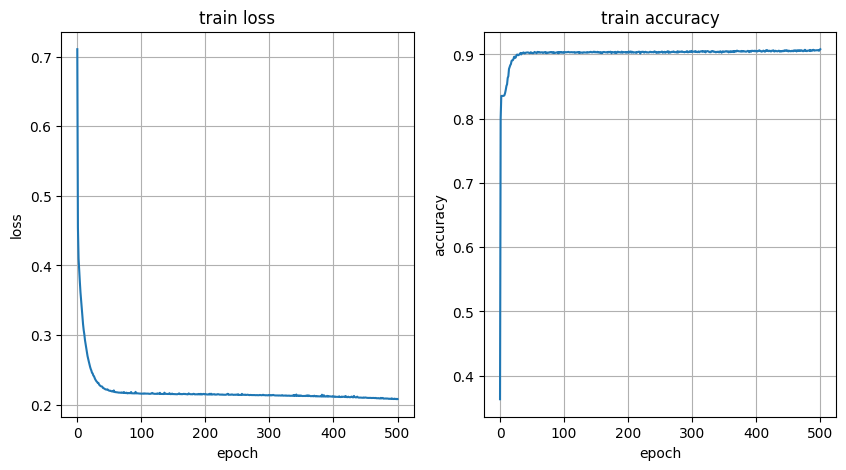

In [ ]:
def loss_func(Y, T):
    """
        Y(batch_size, 1): モデルの出力
        T(batch_size, 1): 教師信号
    """
    E = torch.nn.BCELoss()(Y, T)
    return E

def accuracy_func(Y, T):
    Y = Y.round()
    T = T.round()
    A = (Y == T).float().mean()
    return A

def iteration(X_batch, T_batch, model, optimizer = None):

    # 学習する場合
    if optimizer is not None:
        optimizer.zero_grad()
        Y_batch = model(X_batch)
        E_batch = loss_func(Y_batch, T_batch)
        E_batch.backward()
        optimizer.step()

    # 学習しない場合
    else:
        with torch.no_grad():
            Y_batch = model(X_batch)
            E_batch = loss_func(Y_batch, T_batch)

    A_batch = accuracy_func(Y_batch, T_batch)

    return E_batch.item(), A_batch.item()

def epoch(X, T, model, optimizer = None):

    # 全データをランダムに並べ替える
    random_idx = torch.randperm(X.size(0))
    X = X[random_idx]
    T = T[random_idx]

    E = 0
    A = 0
    total_data = 0

    pb = tqdm(range(0, len(X), BATCH_SIZE))
    for idx in pb:

        # ミニバッチのデータを抽出
        X_batch = X[idx:idx + BATCH_SIZE]
        T_batch = T[idx:idx + BATCH_SIZE]

        E_batch, A_batch = iteration(X_batch, T_batch, model, optimizer)

        # ミニバッチの平均になっている誤差と精度を総和に戻す
        E += E_batch * len(X_batch)
        A += A_batch * len(X_batch)
        total_data += len(X_batch)

        pb.set_postfix({"loss": E / total_data,
                        "accuracy": A / total_data})

    # 全データでの平均の誤差と精度
    E /= total_data
    A /= total_data

    return E, A

# 学習のパラメータ
LEARNING_RATE = 0.1
BATCH_SIZE = 691
EPOCHS = 500

model = MyModel()
optimizer = torch.optim.SGD(model.parameters(), lr = LEARNING_RATE)
loss_func = loss_func

# 学習履歴を保存する配列
loss_history = list()
accuracy_history = list()

# 学習前の損失，精度
E, A = epoch(train_x, train_t, model)
loss_history.append(E)
accuracy_history.append(A)

for i in range(EPOCHS):
    print(f"epoch; {i + 1}")
    E, A = epoch(train_x, train_t, model, optimizer)
    loss_history.append(E)
    accuracy_history.append(A)

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_history)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("train loss")
ax.grid()

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_history)
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")
ax.set_title("train accuracy")
ax.grid()

In [ ]:
E, A = epoch(test_x, test_t, model)
E, A

100%|██████████| 2/2 [00:00<00:00, 330.87it/s, loss=0.242, accuracy=0.894]


(0.24171788783371448, 0.894000016450882)